In [1]:
import math
import numpy as np                  # numpy
import pandas as pd
import matplotlib.pyplot as plt     # pyplot

In [2]:
def DiffCoef_Para(x):
    D = D_out * np.ones(np.shape(x))
    D[a>np.absolute(x)] = (D_out - D_in) * (x[a>np.absolute(x)]**2)/(a**2) + D_in
    return D

def Potential_Para(x):
    V = V_out * np.ones(np.shape(x))
    V[a>np.absolute(x)] = (V_out - V_in) * (x[a>np.absolute(x)]**2)/(a**2) + V_in
    return V

def Force_Para(x): 
    f = np.zeros(np.shape(x))
    f[a>np.absolute(x)] = -(V_out - V_in) * (2*x[a>np.absolute(x)])/(a**2)
    return f

def TransRate(x):
    W = DiffCoef_Para(x)/di**2 * np.exp(-(di*Force_Para(x))/(2*DiffCoef_Para(x)))
    return W

def PeriodicBC(x, L): 
    return (x+L)%(2.0 * L) - L

In [3]:
D_out = 1           # diffusivity outside the well
D_in = 0.5          # diffusivity inside the well, impossible to have 0 diffusivity
V_out = 0           # potential energy outside the well
V_in = -3           # potential energy inside the well, from other paper lab data
a = 2               # well size
L = 5               # "cell" size
step = 1000
length = 100        # number of position grid #even number only!!!
test_number = 100   # number of protein
x_range = 15        # moving range 
mid_point = 0       # moving midpoint

x = np.zeros((test_number,step)) #all index position at different time
x_2D = np.zeros((test_number,step)) #all index position at different time
y_2D = np.zeros((test_number,step)) #all index position at different time
x_time = np.zeros((test_number,step)) #list of time of movement
x_time_2D = np.zeros((test_number,step)) #list of time of movement

i = np.linspace(mid_point - x_range, mid_point + x_range, length) #list of real position
j = np.linspace(mid_point - x_range, mid_point + x_range, length) #list of real position
di = np.mean(np.diff(i))
index = np.arange(length)
index_neighbour = np.vstack((np.roll(index,1), np.roll(index,-1)))

In [4]:
#D = DiffCoef_Para(i)
#P = Potential_Para(i)

D = DiffCoef_Para(PeriodicBC(i, L)) #Periodic
P = Potential_Para(PeriodicBC(i, L))

W1 = (D[index]/di**2)*np.exp(-(P[index_neighbour[0]]-P[index])/2)
W2 = (D[index]/di**2)*np.exp(-(P[index_neighbour[1]]-P[index])/2)

In [5]:
x[:,0] = int(length/2)

for s in range(step-1):
    for n in range(test_number):
        r1 = np.random.rand() 
        r2 = np.random.rand()
        
        i_start = int(x[n,s])
        W_all = W1[i_start] + W2[i_start]
        tau = (1/W_all) * (np.log(1/r1))
        x_time[n,s+1] = x_time[n,s] + tau
        if 0<=r2*W_all and r2*W_all<W1[i_start]:
            x[n,s+1] = index_neighbour[0, i_start]
        elif W1[i_start]<=r2*W_all and r2*W_all<W_all:
            x[n,s+1] = index_neighbour[1, i_start]
        else:
            print("error") #bug check only

Text(0, 0.5, 'Position')

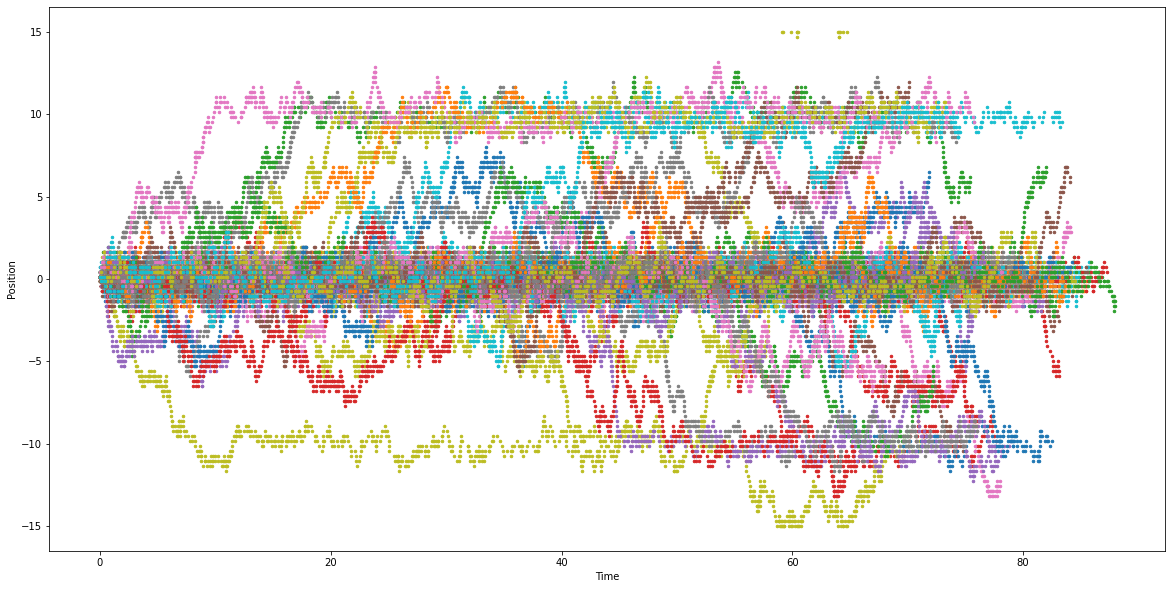

In [6]:
plt.rcParams["figure.figsize"] = (20, 10)
x_real = i[x.astype(int)]

for n in range(test_number):
    plt.plot(x_time[n],x_real[n],".", markersize=5)

plt.xlabel('Time')
plt.ylabel('Position')    

#plt.ylim(-7, 7)
#plt.plot((0,40),(2,2), color='black')
#plt.plot((0,40),(-2,-2), color='black')
#plt.legend(np.arange(test_number), loc = 1, bbox_to_anchor = (1.05, 1))

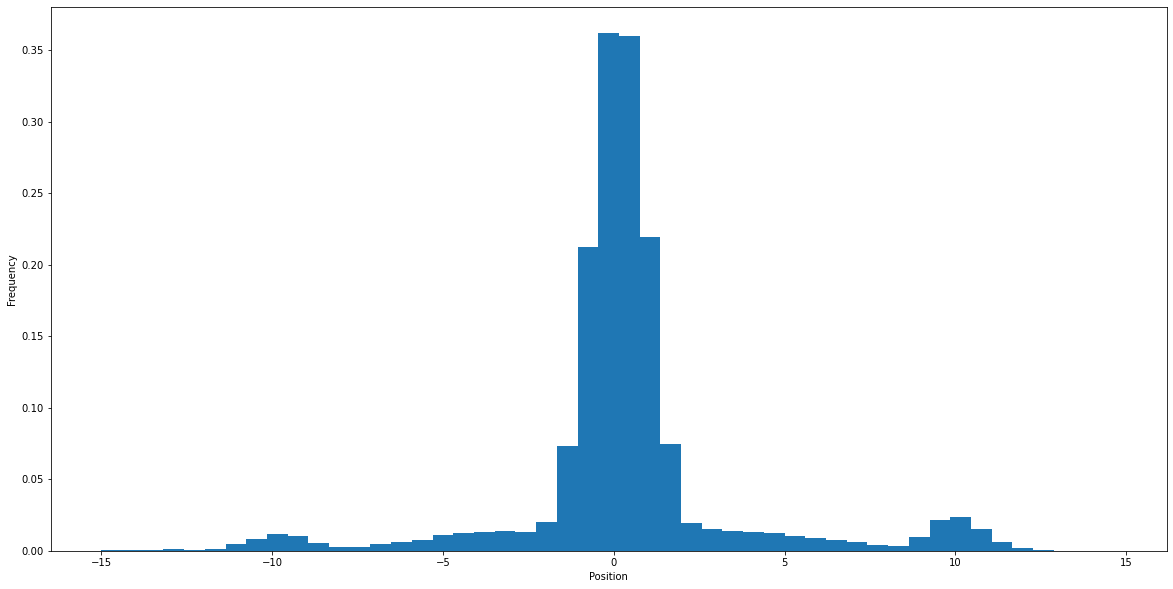

In [23]:
n, bins, patches = plt.hist(np.reshape(x_real, -1), bins = i[::2], density = True)
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.show()

In [8]:
dwell = np.zeros((step))

for s in range(step):
    for n in range(test_number):
        if -2 < x_real[n,s] and x_real[n,s] < 2:
            dwell[s] = dwell[s] + 1
        elif 8 < x_real[n,s] and x_real[n,s] < 12:
            dwell[s] = dwell[s] + 1
        elif -12 < x_real[n,s] and x_real[n,s] < -8:
            dwell[s] = dwell[s] + 1
        else:
            dwell[s] = dwell[s] + 0

Text(0, 0.5, 'Number of proteins')

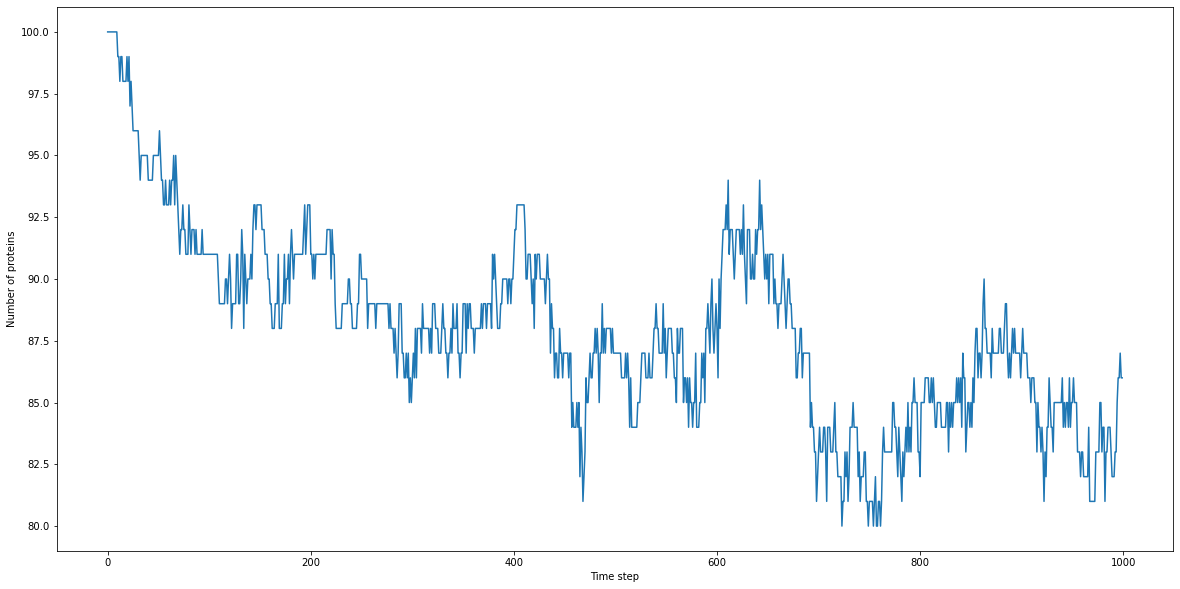

In [9]:
plt.plot(range(step), dwell)
#plt.ylim(0, 510)
plt.xlabel('Time step')
plt.ylabel('Number of proteins')


# 2D

In [10]:
# for making i_2D
i_1 = np.linspace(mid_point - x_range, mid_point + x_range, length)
i_2 = np.array([i_1,np.ones(length)*x_range])
i_3 = np.array([i_1,np.ones(length)*-x_range])

i_2D = np.linspace((i_2.T),(i_3.T),length) #real position, not index

In [11]:
index_1 = np.array([np.arange(length),np.zeros(length)]).T
index_2 = np.array([np.arange(length),np.ones(length)*length-1]).T
index_2D = np.linspace((index_1),(index_2),length)
index_2D = index_2D.astype(int)

In [12]:
# n means neighbour here
# useless now
index_n_2D_L = np.roll(index_2D, 1, axis=1) #moving left
index_n_2D_R = np.roll(index_2D,-1, axis=1) #moving right
index_n_2D_U = np.roll(index_2D, 1, axis=0) #moving up
index_n_2D_D = np.roll(index_2D,-1, axis=0) #moving down

In [13]:
r_2D = np.sqrt(i_2D[:,:,0]**2 + i_2D[:,:,1]**2)

#D_2D = DiffCoef_Para(PeriodicBC(r_2D, L))
#V_2D = Potential_Para(PeriodicBC(r_2D, L))

D_2D = DiffCoef_Para(r_2D)
V_2D = Potential_Para(r_2D)

W1_2D = (D_2D/di**2)*np.exp(-(np.roll(V_2D, 1, axis=1)-V_2D)/2) #left
W2_2D = (D_2D/di**2)*np.exp(-(np.roll(V_2D,-1, axis=1)-V_2D)/2) #right
W3_2D = (D_2D/di**2)*np.exp(-(np.roll(V_2D, 1, axis=0)-V_2D)/2) #up
W4_2D = (D_2D/di**2)*np.exp(-(np.roll(V_2D,-1, axis=0)-V_2D)/2) #down

In [14]:
x_2D[:,0] = int(length/2)
y_2D[:,0] = int(length/2)

for s in range(step-1):
    for n in range(test_number):
        r1 = np.random.rand() 
        r2 = np.random.rand()
        
        i_start = int(x_2D[n,s])
        j_start = int(y_2D[n,s])

        w1 = W1_2D[i_start, j_start]
        w2 = W2_2D[i_start, j_start]
        w3 = W3_2D[i_start, j_start]
        w4 = W4_2D[i_start, j_start]
        W_all = w1 + w2 + w3 + w4
        
        tau = (1/W_all) * (np.log(1/r1))
        x_time_2D[n,s+1] = x_time_2D[n,s] + tau
        
        if 0<=r2*W_all and r2*W_all<w1:                  #move left
            x_2D[n,s+1] = x_2D[n,s] - 1
            y_2D[n,s+1] = y_2D[n,s]            
        elif w1<=r2*W_all and r2*W_all<w1+w2:            #move right
            x_2D[n,s+1] = x_2D[n,s] + 1
            y_2D[n,s+1] = y_2D[n,s]
        elif w1+w2<=r2*W_all and r2*W_all<w1+w2+w3:      #move up
            x_2D[n,s+1] = x_2D[n,s]
            y_2D[n,s+1] = y_2D[n,s] + 1
        elif w1+w2+w3<=r2*W_all and r2*W_all<W_all:      #move down
            x_2D[n,s+1] = x_2D[n,s]
            y_2D[n,s+1] = y_2D[n,s] - 1
        else:
            print("error") #bug check only
            
        if x_2D[n,s+1]>=length:
            x_2D[n,s+1] = 0
        elif y_2D[n,s+1]>=length:
            y_2D[n,s+1] = 0      
        if x_2D[n,s+1]<0:
            x_2D[n,s+1] = length-1
        elif y_2D[n,s+1]<0:
            y_2D[n,s+1] = length-1

Text(0, 0.5, 'Position')

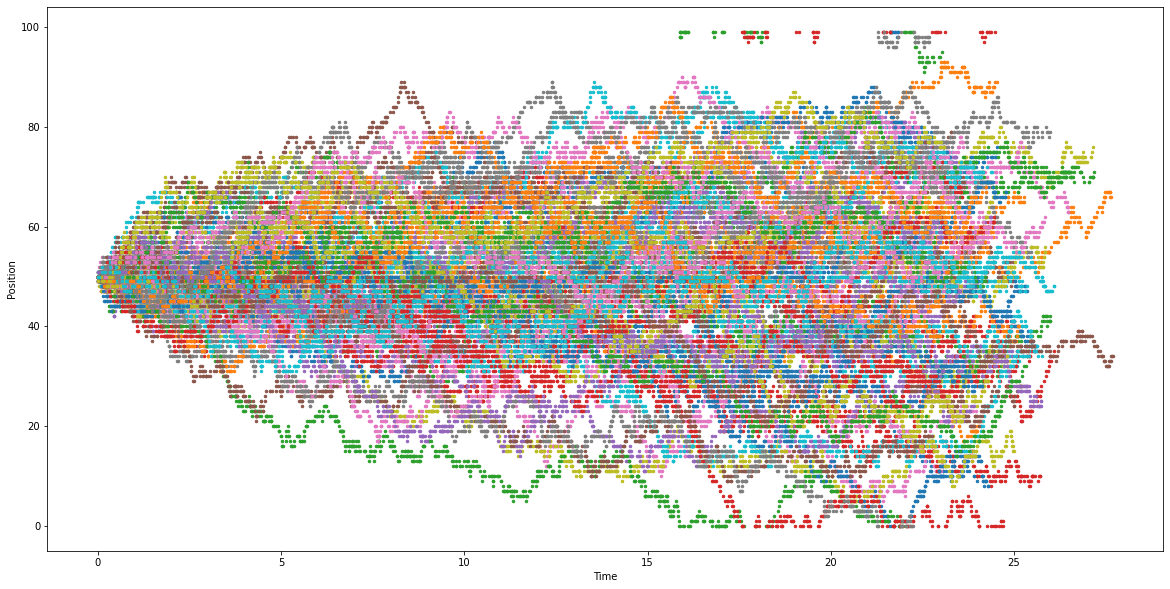

In [15]:
for n in range(test_number):
    plt.plot(x_time_2D[n],x_2D[n],".", markersize=5)

plt.xlabel('Time')
plt.ylabel('Position')   

Text(0, 0.5, 'Position')

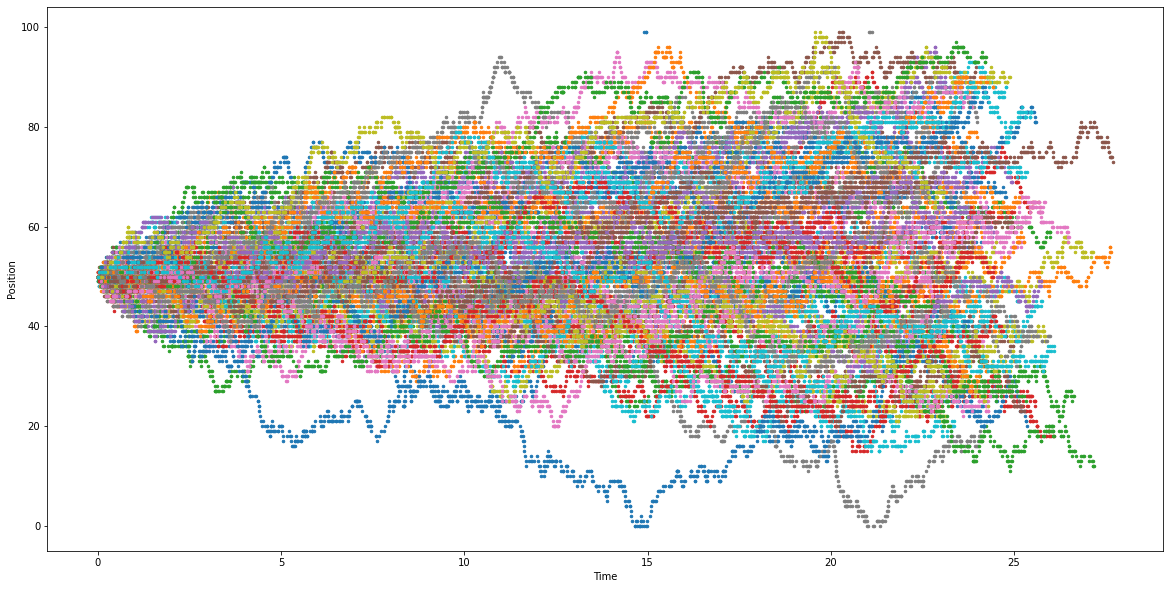

In [16]:
for n in range(test_number):
    plt.plot(x_time_2D[n],y_2D[n],".", markersize=5)

plt.xlabel('Time')
plt.ylabel('Position')

In [17]:
D_2D[45]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.96487603, 0.87304867, 0.80417815, 0.75826446, 0.73530762,
       0.73530762, 0.75826446, 0.80417815, 0.87304867, 0.96487603,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [18]:
np.shape(index_n_2D_D)

(100, 100, 2)